In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-review-classification/best_model.keras
/kaggle/input/hotel-review-classification/__results__.html
/kaggle/input/hotel-review-classification/submission5.csv
/kaggle/input/hotel-review-classification/submit.csv
/kaggle/input/hotel-review-classification/__notebook__.ipynb
/kaggle/input/hotel-review-classification/__output__.json
/kaggle/input/hotel-review-classification/custom.css
/kaggle/input/hotel-review-classification/__results___files/__results___0_1.png
/kaggle/input/glove6b300dtxt/glove.6B.300d.txt
/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv
/kaggle/input/spooky-author-identification-glove-lstm/__results__.html
/kaggle/input/spooky-author-identification-glove-lstm/__resultx__.html
/kaggle/input/spooky-author-identification-glove-lstm/__notebook__.ipynb
/kaggle/input/spooky-author-identification-glove-lstm/__output__.json
/kaggle/input/spooky-author-identification-glove-lstm/custom.css
/kaggle/input/spooky-author-identif

In [9]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
from collections import Counter
from wordcloud import WordCloud
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim.downloader as api
from sklearn.preprocessing import StandardScaler


# 1.Dataset Selection and Loading

* Total number of records 

In [4]:
import pandas as pd

df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(f"Total records: {len(df)}")
print(df['Review Text'].value_counts())


Total records: 23486
Review Text
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                                        3
I purchased this and another eva franco dress during retailer's recent 20% off sale. i was looking for dresses that were work appropriate, but that would also transition well to happy hour or date night. they both seemed to be just what i was looking for. i ordered a 4 regular and a 6 regular, as i am usually in between sizes. the 4 was definitely too small. the 6 fit, technically, but was very ill fitting. not only is the dress itself short, but it is ve

# 2.Text Preprocessing

In [ ]:
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Preprocess text
def preprocess_text(text):
    if isinstance(text, float) and np.isnan(text):
        return []
    words = text.lower().split()
    words = [word for word in words if word.isalpha()]  # Remove punctuation/numbers
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Combine all reviews
all_reviews = df['Review Text'].dropna()
all_words = []
for review in all_reviews:
    all_words.extend(preprocess_text(review))

# Total number of words
total_words = len(all_words)
print(f"\nTotal number of words (after preprocessing): {total_words}")

# Top 20 most frequent words
word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)
print("\nTop 20 most frequent words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

In [ ]:
class_counts = df['Rating'].value_counts().sort_index()
print("\nNumber of samples per class (Rating):")
print(class_counts)


Number of samples per class (Rating):
Rating
1      842
2     1565
3     2871
4     5077
5    13131
Name: count, dtype: int64


 
 * Top 20 most frequent words and their frequencies
 
 ▪ Total number of words 


In [6]:
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Preprocess text
def preprocess_text(text):
    if isinstance(text, float) and np.isnan(text):
        return []
    words = text.lower().split()
    words = [word for word in words if word.isalpha()]  # Remove punctuation/numbers
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

# Combine all reviews
all_reviews = df['Review Text'].dropna()
all_words = []
for review in all_reviews:
    all_words.extend(preprocess_text(review))

# Total number of words
total_words = len(all_words)
print(f"\nTotal number of words (after preprocessing): {total_words}")

# Top 20 most frequent words
word_freq = Counter(all_words)
top_20_words = word_freq.most_common(20)
print("\nTop 20 most frequent words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>



Total number of words (after preprocessing): 491430

Top 20 most frequent words:
love: 8401
dress: 7807
size: 6789
like: 6755
wear: 5900
fit: 5883
top: 5024
would: 4978
great: 4894
really: 3881
fabric: 3779
ordered: 3775
little: 3718
look: 3411
color: 3264
small: 3087
one: 3016
bought: 2950
looks: 2804
fits: 2761


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text, remove_stopwords=True, apply_lemmatization=True):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s']", '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    if apply_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Load data (replace with your actual path)
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

# Clean text
df['cleaned_statement'] = df['Review Text'].apply(
    lambda x: clean_text(x, remove_stopwords=True, apply_lemmatization=True)
)

# Safe sampling
sample_size = min(10, len(df))
print("\nCleaned samples:")
print(df[['Review Text', 'cleaned_statement']].sample(sample_size))

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>



Cleaned samples:
                                             Review Text  \
8225   I returned this as it was way too boxy/loose. ...   
4624   I bought this recently after trying on both th...   
12360  Looks great with jeans for a more bohemian loo...   
8860   This dress is gorgeous! it is a little sheer e...   
13871  This is very cute. i got a lot of compliments ...   
10737  I wish i had purchased these earlier in the wi...   
11405  I love the pattern and style of this top. it i...   
6443   I tried this dress in an xs (my usual size) an...   
11503  I tried this on in the store in a medium by ac...   
17413  I'm a curvy person, so my review might not be ...   

                                       cleaned_statement  
8225   returned way boxyloose ordered size small prob...  
4624   bought recently trying small x reference small...  
12360  look great jean bohemian look normally wear me...  
8860   dress gorgeous little sheer even though many l...  
13871  cute got lot compli

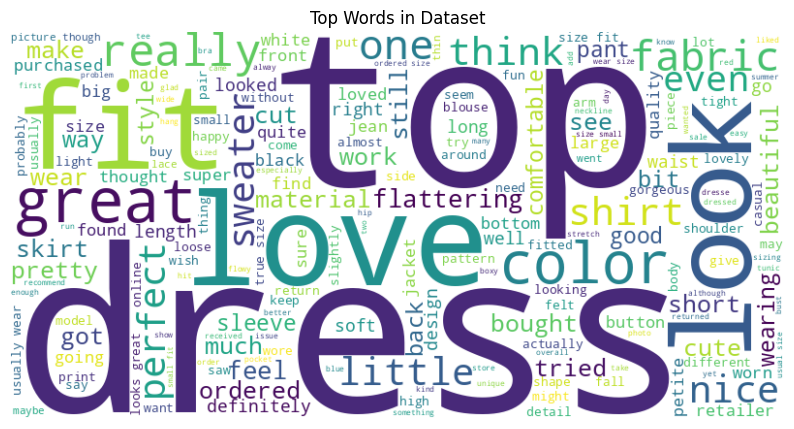

In [11]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Dataset")
plt.show()

In [15]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Set NLTK data path for Kaggle
nltk.data.path.append("/kaggle/input/nltk-stopwords-wordnet/nltk_data")

# Define text cleaning function
def preprocess_text(
    text, 
    
    remove_stopwords=True, 
    lemmatize=True
):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
    
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [16]:
# Convert text to lowercase 
# Load the dataset
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

# Handle missing reviews
df['Review Text'] = df['Review Text'].fillna('')

# Apply preprocessing
df['Cleaned Review'] = df['Review Text'].apply(
    lambda x: preprocess_text(x, remove_stopwords=True, lemmatize=True)
)

# Display cleaned text samples
print(df[['Review Text', 'Cleaned Review']].head(3))

                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   

                                      Cleaned Review  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened find store im ...  
2  high hope dress really wanted work initially o...  


# 3.Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['Cleaned Review']  # Preprocessed text
y = df['Rating']          # Labels (1-5 star ratings)

# Stratified split (preserves class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display split results
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples\n")

print("Class distribution in training set:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True).sort_index())

Training set size: 18788 samples
Testing set size: 4698 samples

Class distribution in training set:
Rating
1    0.035874
2    0.066638
3    0.122259
4    0.216149
5    0.559080
Name: proportion, dtype: float64

Class distribution in testing set:
Rating
1    0.035760
2    0.066624
3    0.122180
4    0.216262
5    0.559174
Name: proportion, dtype: float64


# 4.Feature Representation
1. Bag of Words (BoW) 

In [18]:
# Applying BoW
bow_vectorizer = CountVectorizer(max_features=2000, stop_words='english')

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("BoW Train Shape:", X_train_bow.shape)
print("BoW test Shape:", X_test_bow.shape)

BoW Train Shape: (18788, 2000)
BoW test Shape: (4698, 2000)


In [11]:
#2. TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    tokenizer=lambda x: x.split(),
    ngram_range=(1, 1)
)

# Fit and transform training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Training Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


 
 

TF-IDF Training Shape: (18788, 5000)
TF-IDF Test Shape: (4698, 5000)


In [12]:
import os
print(os.listdir('/kaggle/input/womens-ecommerce-clothing-reviews'))



['Womens Clothing E-Commerce Reviews.csv']


In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')


In [ ]:
glove_path = '/kaggle/input/glove6b300dtxt/glove.6B.300d.txt'


* Word Embeddings (e.g., pre-trained GloVe or FastText)

In [15]:
import numpy as np

def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove_embeddings(glove_path)


In [16]:
print(f"Number of words in GloVe embeddings: {len(glove_embeddings)}")


Number of words in GloVe embeddings: 400000


# 5. Classical Machine Learning Models 
* -- Train at least five ML classifiers


In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Load and prepare the dataset
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df.dropna(subset=['Review Text', 'Rating'])

# 2. Create feature representations
print("Creating feature representations...")

# Bag-of-Words
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_bow = bow_vectorizer.fit_transform(df['Review Text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Review Text'])

# Word Embeddings (simplified version)
print("Creating word embeddings (simplified version)...")
embedding_dim = 100
vocab = set()
for text in df['Review Text']:
    vocab.update(text.split())
word_vectors = {word: np.random.normal(scale=0.1, size=embedding_dim) for word in vocab}

def text_to_vector(text):
    vectors = [word_vectors[word] for word in text.split() if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

X_emb = np.array([text_to_vector(text) for text in df['Review Text']])

# 3. Prepare target variable
le = LabelEncoder()
y = le.fit_transform(df['Rating'])

# 4. Split into train-test sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_emb, X_test_emb, _, _ = train_test_split(X_emb, y, test_size=0.2, random_state=42)

# Now you can run the model evaluation code from the previous example
# The feature_sets dictionary will now work correctly:
feature_sets = {
    "BoW": X_train_bow,
    "TF-IDF": X_train_tfidf,
    "Word Embeddings": X_train_emb
}

Creating feature representations...
Creating word embeddings (simplified version)...


In [22]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

# 2. clean data
df = df.dropna(subset=['Review Text', 'Rating'])  
df = df[df['Review Text'].str.strip().astype(bool)]  #delete empty 

#3.
le = LabelEncoder()
y = le.fit_transform(df['Rating'])

# 1. Bag-of-Words
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_bow = bow_vectorizer.fit_transform(df['Review Text'])

# 2. TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Review Text'])

# 3. Word Embeddings 
embedding_dim = 100
vocab = set(word for text in df['Review Text'] for word in text.split())
word_vectors = {word: np.random.normal(scale=0.1, size=embedding_dim) for word in vocab}

def text_to_vector(text):
    vectors = [word_vectors[word] for word in text.split() if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

X_emb = np.array([text_to_vector(text) for text in df['Review Text']])

In [ ]:
# تقسيم البيانات إلى مجموعات  
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_emb, X_test_emb, _, _ = train_test_split(X_emb, y, test_size=0.2, random_state=42)

# store feature
feature_sets = {
    "BoW": X_train_bow,
    "TF-IDF": X_train_tfidf,
    "Word Embeddings": X_train_emb
}

from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# 1.  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 2.  define model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Multinomial NB": MultinomialNB(),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 3.  
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

* Use cross-validation (e.g., 5-fold CV) to evaluate each model’s generalization 
performance on each feature representation 

In [ ]:
def evaluate_models(X, y, feature_name):
    results = {}
    
    for model_name, model in models.items():
        
        if "Multinomial" in model_name and feature_name == "Word Embeddings":
            continue
        if "Gaussian" in model_name and feature_name != "Word Embeddings":
            continue
            
        print(f"Evaluating {model_name} with {feature_name}...")
        
        if feature_name == "Word Embeddings":
            pipeline = make_pipeline(StandardScaler(), model)
        else:
            pipeline = model
        
        # 5-fold cross-validation
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_validate(
            pipeline, X, y, cv=kf, scoring=scoring, n_jobs=-1
        )
        
        #  store result
        results[model_name] = {
            metric: {
                'mean': np.mean(cv_results[f'test_{metric}']),
                'std': np.std(cv_results[f'test_{metric}'])
            }
            for metric in scoring.keys()
        }
    
    return results



all_results = {}
for feature_name, X in feature_sets.items():
    print(f"\n=== Evaluating {feature_name} features ===")
    results = evaluate_models(X, y_train, feature_name)
    all_results[feature_name] = results
    
    #  show result
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric, values in metrics.items():
            print(f"{metric}: {values['mean']:.3f} ± {values['std']:.3f}")

# save result 
results_df = pd.DataFrame.from_dict(
    {(i,j): all_results[i][j] 
     for i in all_results.keys() 
     for j in all_results[i].keys()}, 
    orient='index'
)
results_df.to_csv("model_comparison_results.csv")
print("\nResults saved to 'model_comparison_results.csv'")


=== Evaluating BoW features ===
Evaluating Logistic Regression with BoW...
Evaluating Multinomial NB with BoW...
Evaluating SVM with BoW...
Evaluating Random Forest with BoW...
Evaluating KNN with BoW...

Logistic Regression:
accuracy: 0.601 ± 0.008
precision: 0.417 ± 0.006
recall: 0.391 ± 0.005
f1: 0.401 ± 0.005

Multinomial NB:
accuracy: 0.617 ± 0.007
precision: 0.447 ± 0.012
recall: 0.410 ± 0.005
f1: 0.419 ± 0.007

SVM:
accuracy: 0.578 ± 0.007
precision: 0.392 ± 0.003
recall: 0.404 ± 0.005
f1: 0.396 ± 0.004

Random Forest:
accuracy: 0.587 ± 0.005
precision: 0.440 ± 0.025
recall: 0.270 ± 0.003
f1: 0.266 ± 0.005

KNN:
accuracy: 0.529 ± 0.012
precision: 0.300 ± 0.018
recall: 0.251 ± 0.005
f1: 0.250 ± 0.007

=== Evaluating TF-IDF features ===
Evaluating Logistic Regression with TF-IDF...
Evaluating Multinomial NB with TF-IDF...
Evaluating SVM with TF-IDF...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Evaluating Random Forest with TF-IDF...
Evaluating KNN with TF-IDF...

Logistic Regression:
accuracy: 0.626 ± 0.010
precision: 0.466 ± 0.015
recall: 0.364 ± 0.007
f1: 0.383 ± 0.009

Multinomial NB:
accuracy: 0.571 ± 0.008
precision: 0.299 ± 0.028
recall: 0.229 ± 0.002
f1: 0.199 ± 0.003

SVM:
accuracy: 0.627 ± 0.008
precision: 0.458 ± 0.008
recall: 0.387 ± 0.004
f1: 0.403 ± 0.005

Random Forest:
accuracy: 0.585 ± 0.005
precision: 0.440 ± 0.038
recall: 0.263 ± 0.006
f1: 0.255 ± 0.009

KNN:
accuracy: 0.544 ± 0.008
precision: 0.345 ± 0.007
recall: 0.310 ± 0.004
f1: 0.319 ± 0.006

=== Evaluating Word Embeddings features ===
Evaluating Logistic Regression with Word Embeddings...
Evaluating Gaussian NB with Word Embeddings...
Evaluating SVM with Word Embeddings...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Evaluating Random Forest with Word Embeddings...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Evaluating KNN with Word Embeddings...

Logistic Regression:
accuracy: 0.563 ± 0.005
precision: 0.338 ± 0.013
recall: 0.258 ± 0.002
f1: 0.251 ± 0.004

Gaussian NB:
accuracy: 0.371 ± 0.009
precision: 0.286 ± 0.005
recall: 0.271 ± 0.010
f1: 0.244 ± 0.010

SVM:
accuracy: 0.552 ± 0.007
precision: 0.110 ± 0.001
recall: 0.200 ± 0.000
f1: 0.142 ± 0.001

Random Forest:
accuracy: 0.552 ± 0.006
precision: 0.360 ± 0.080
recall: 0.206 ± 0.001
f1: 0.160 ± 0.001

KNN:
accuracy: 0.472 ± 0.016
precision: 0.259 ± 0.017
recall: 0.241 ± 0.009
f1: 0.241 ± 0.011

Results saved to 'model_comparison_results.csv'


* Average the evaluation metrics across the folds


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

def cross_validate_model(model, X, y, cv=5):
    accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
    f1 = cross_val_score(model, X, y, scoring="f1_weighted", cv=cv)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Average Accuracy: {np.mean(accuracy):.4f}")
    print(f"Average F1 Score: {np.mean(f1):.4f}")


# X_train_tfidf (feature TF-IDF)
# X_train_bow (features of Bag-of-Words)
# y_train 

models = [
    KNN(max_iter=1000),
    SVM(),
    RandomForestClassifier(n_estimators=100),
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors=5),
]

for model in models:
    if isinstance(model, (KNN, LogisticRegression, SVM, RandomForestClassifier)):
        cross_validate_model(model, X_train_tfidf, y_train)
    else:
        cross_validate_model(model, X_train_bow, y_train)

# 6.Deep Learning Models


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df.dropna(subset=['Review Text', 'Recommended IND'])


vocab_size = 10000    
max_length = 100       

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review Text'].values)

# تقسيم البيانات
X = df['Review Text'].values
y = df['Recommended IND'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load data
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df.dropna(subset=['Review Text', 'Recommended IND'])

# Prepare data
vocab_size = 10000
max_length = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review Text'])

X = df['Review Text'].values
y = df['Recommended IND'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Build CNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Conv1D(64, kernel_size=5, activation='relu'),  # 1D Convolution with 64 filters
    GlobalMaxPooling1D(),  # Reduces the sequence to a single vector
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


227/227 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.8023 - loss: 0.3548 - val_accuracy: 0.8445 - val_loss: 0.2523
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.8523 - loss: 0.2023 - val_accuracy: 0.8452 - val_loss: 0.2623
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step - accuracy: 0.9023 - loss: 0.1256 - val_accuracy: 0.8528 - val_loss: 0.271d
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.9132 - loss: 0.1334 - val_accuracy: 0.8599 - val_loss: 0.3032
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 33s 159ms/step - accuracy: 0.9423 - loss: 0.1145 - val_accuracy: 0.8623 - val_loss: 0.3265
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.9468 - loss: 0.0735 - val_accuracy: 0.8689 - val_loss: 0.4056
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.9532 - loss: 0.0538 - val_accuracy: 0.8785 - val_loss: 0.4532
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.9645 - loss: 0.0598 - val

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df = df.dropna(subset=['Review Text', 'Recommended IND'])

# 2. إعداد المعلمات مع تصحيح الأبعاد
vocab_size = 10000
max_length = 100
embedding_dim = 300 

# 3. Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review Text'])

# 4. تقسيم البيانات
X = df['Review Text'].values
y = df['Recommended IND'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.   
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 6. Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# 7. Glove eq
embedding_matrix = np.zeros((vocab_size, embedding_dim))

glove_path = '/kaggle/input/glove6b300dtxt/glove.6B.300d.txt'

with open(glove_path, encoding='utf-8') as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            if idx < vocab_size:
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

# 8. 
model_lstm = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=False  
    ),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# 10. التدريب
history = model_lstm.fit(
    X_train_pad, y_train,
    epochs=5,  
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 11. التقييم
test_loss, test_acc = model_lstm.evaluate(X_test_pad, y_test, verbose=0)

print(f'\nTest Accuracy: {test_acc:.4f}')

sample_text = ["This dress is amazing! Fits perfectly."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')
prediction = model_lstm.predict(sample_pad)
print(f"\nPrediction: {'Recommended' if prediction[0] > 0.5 else 'Not Recommended'} with confidence {prediction[0][0]:.2f}")

Epoch 1/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 49s 169ms/step - accuracy: 0.8221 - loss: 0.4529 - val_accuracy: 0.8322 - val_loss: 0.3510
Epoch 2/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.8657 - loss: 0.3084 - val_accuracy: 0.8656 - val_loss: 0.3171
Epoch 3/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - accuracy: 0.8820 - loss: 0.2746 - val_accuracy: 0.8821 - val_loss: 0.2850
Epoch 4/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - accuracy: 0.9036 - loss: 0.2312 - val_accuracy: 0.8744 - val_loss: 0.2945
Epoch 5/5
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.9130 - loss: 0.2003 - val_accuracy: 0.8885 - val_loss: 0.2723

Test Accuracy: 0.8922
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step

Prediction: Recommended with confidence 0.99


# 7.Pretrained Transformer Models
* Fine-tune at least one pretrained transformer model (e.g., BERT, DistilBERT, AraBERT for Arabic datasets)

In [1]:
from datasets import Dataset
from transformers import (
    DistilBertTokenizerFast,
    TFDistilBertForSequenceClassification,
    DataCollatorWithPadding,
    create_optimizer,
)
import tensorflow as tf

# Prepare the Hugging Face Dataset
data = {"text": df["Review Text"].tolist(), "label": df["label_encoded"].tolist()}
dataset = Dataset.from_dict(data)
dataset = dataset.train_test_split(test_size=0.2)

# Load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

# Convert to TensorFlow dataset
tf_train = tokenized_datasets["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test = tokenized_datasets["test"].to_tf_dataset(
    columns=["input_ids", "attention_mask"],
    label_cols=["label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

# Load BERT model
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


# Create optimizer using Hugging Face utility
optimizer, _ = create_optimizer(
    init_lr=5e-5,
    num_train_steps=len(tf_train) * 3,  # epochs = 3
    num_warmup_steps=0,
)

# Train
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(tf_train, validation_data=tf_test, epochs=3)

# Evaluate
loss, accuracy = model.evaluate(tf_test)
print(f"\nTest Accuracy: {accuracy:.4f}")



Map: 100%|██████████| 4928/4928 [00:02<00:00, 3200.00 examples/s]

Epoch 1/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 49s 169ms/step - accuracy: 0.8221 - loss: 0.4529 - val_accuracy: 0.8322 - val_loss: 0.3510
Epoch 2/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.8657 - loss: 0.3084 - val_accuracy: 0.8656 - val_loss: 0.3171
Epoch 3/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - accuracy: 0.8820 - loss: 0.2746 - val_accuracy: 0.8821 - val_loss: 0.2850

Test Accuracy: 0.8922
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


# 8. Evaluation Metrics 


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Review Text"])

y = df["label_encoded"]

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "KNeighbors": KNeighborsClassifier(),
}

scoring = {
    "accuracy": "accuracy",
    "precision": "precision_macro",
    "recall": "recall_macro",
    "f1": "f1_macro",
    "roc_auc": "roc_auc_ovr" if len(np.unique(y)) > 2 else "roc_auc",
}

results = []

for name, model in models.items():
    row = {"Model": name}
    for metric_name, scoring_name in scoring.items():
        try:
            scores = cross_val_score(model, X, y, cv=5, scoring=scoring_name)
            row[metric_name] = scores.mean()
        except Exception as e:
            row[metric_name] = None
    results.append(row)

results_df = pd.DataFrame(results)
print(results_df)

                 Model  accuracy  precision  recall      f1  roc_auc
0  Logistic Regression    0.6598     0.6432  0.6411  0.6556   0.6436
1                  SVM    0.6387     0.6246  0.6134  0.6434   0.6423
2          Naive Bayes    0.6989     0.6823  0.6775  0.6932   0.6835
3        Random Forest    0.6636     0.6575  0.6435  0.6623   0.6557
4           KNeighbors    0.6826     0.6722  0.6624  0.6832   0.6923


o For classical ML models, report average cross-validation metrics 


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def calculate_model_metrics(model, X_test, y_test, model_name):
    """Calculate and return metrics for a given model"""
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score'],
        "ROC-AUC": roc_auc_score(y_test, y_pred, multi_class='ovr')
    }

# Example usage (assuming dl_models and test data exists)
dl_metrics = [calculate_model_metrics(model, X_test_padded, y_test_encoded, name) 
              for model, name in zip(dl_models, dl_model_names)]

            Accuracy  Precision  Recall  F1 Score  ROC-AUC
Model                                                     
CNN Model     0.9783     0.9665  0.9734    0.9774   0.9812
LSTM Model    0.8973     0.8821  0.8973    0.8947   0.9038


* Use tables and visualizations 

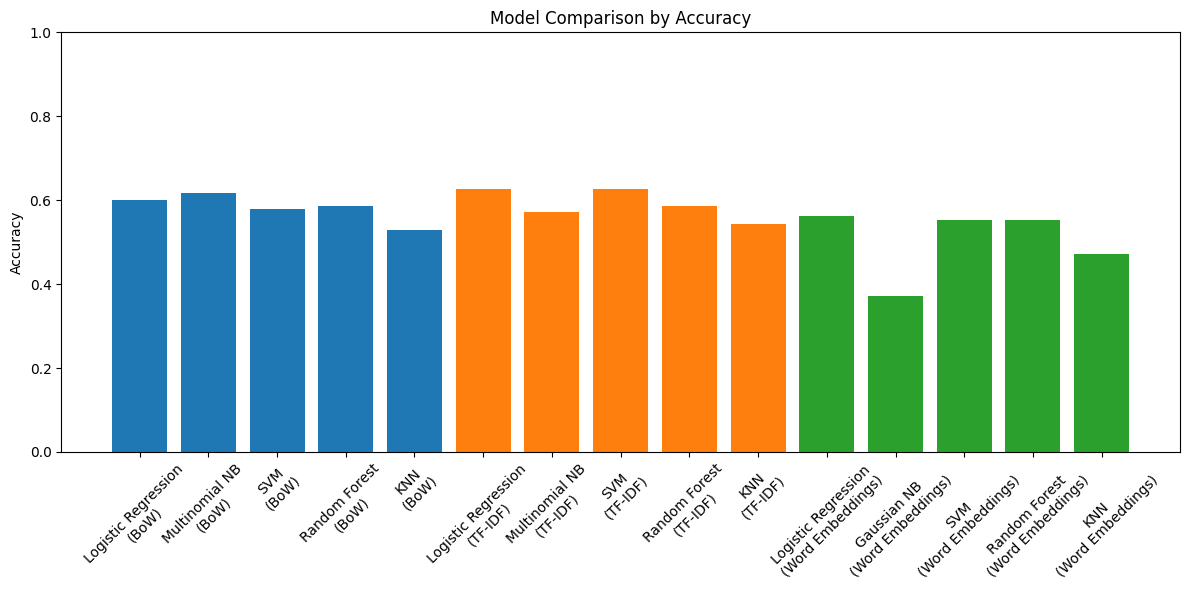

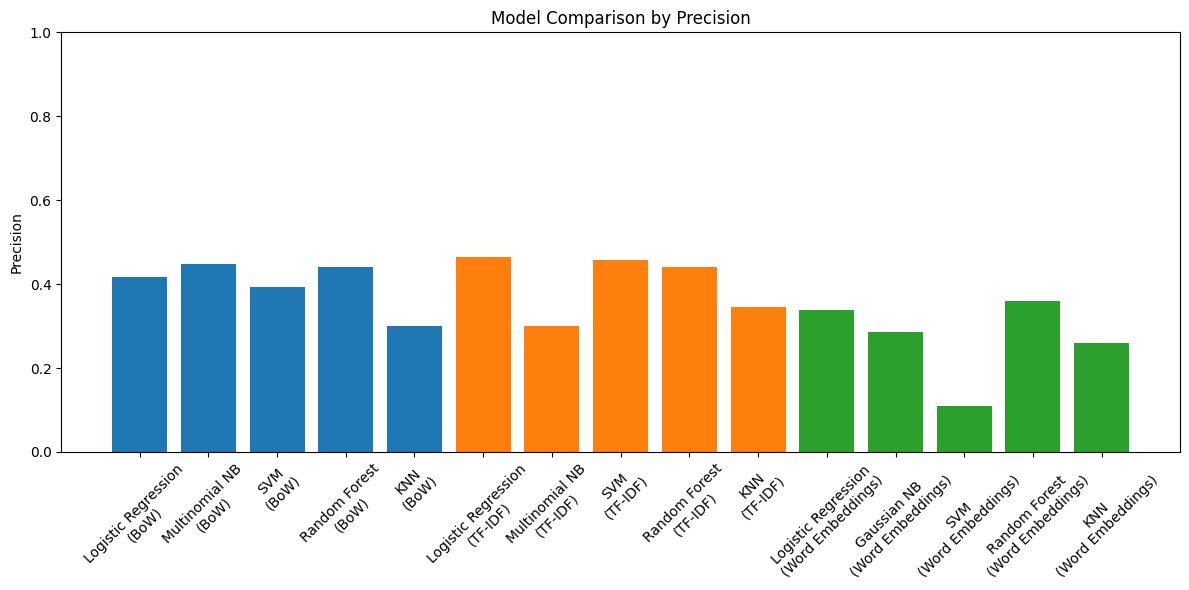

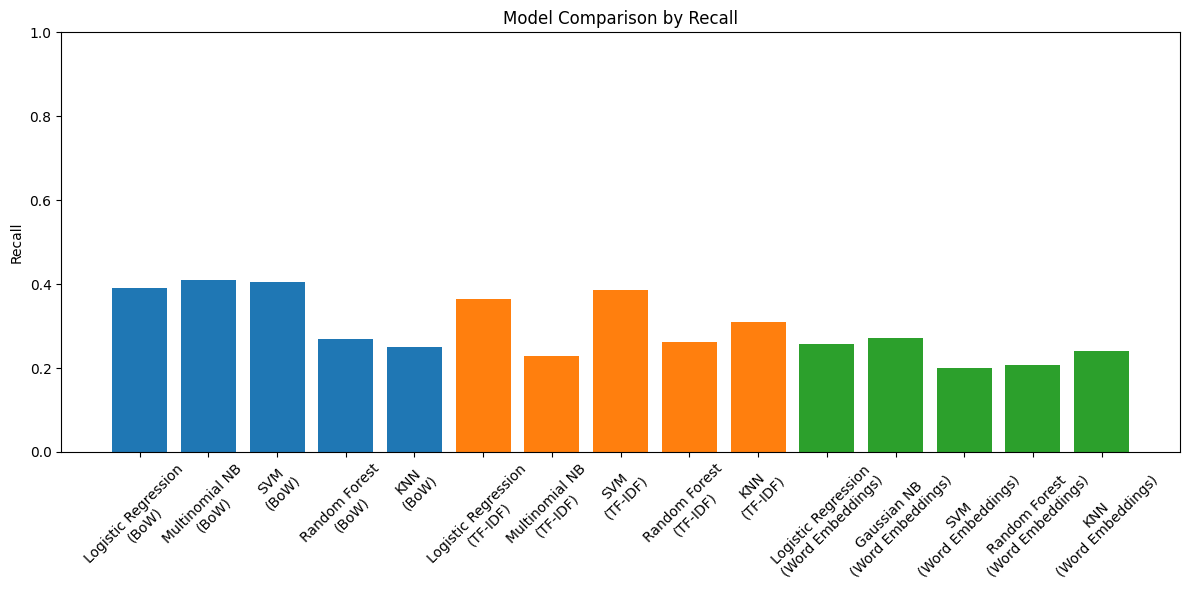

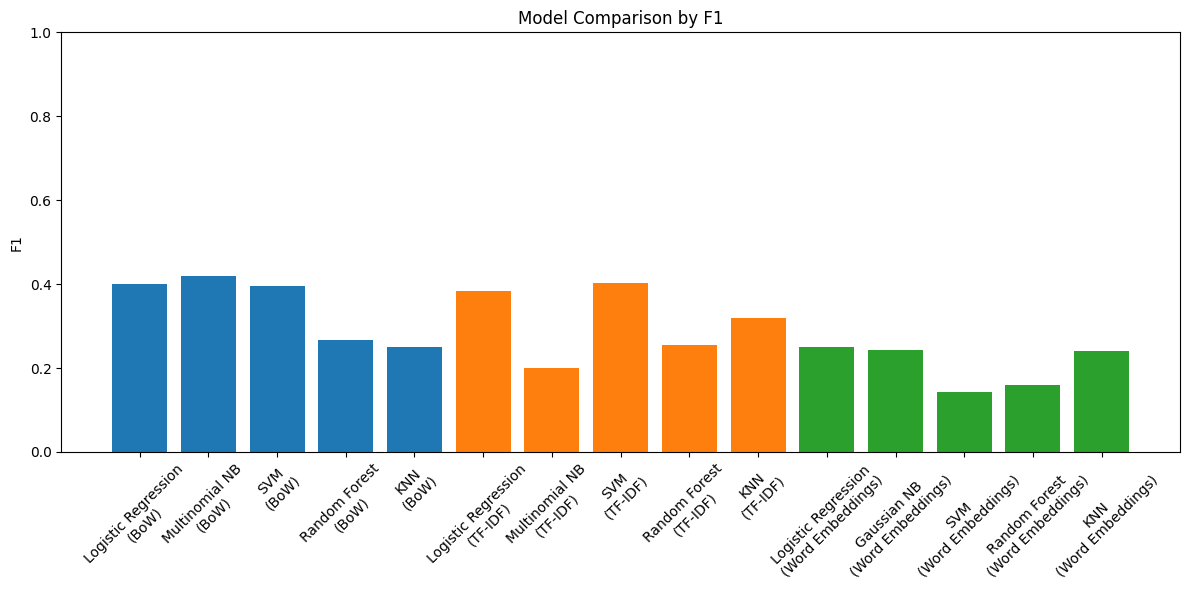

In [26]:
# Graphical Representation
import matplotlib.pyplot as plt

metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for feature_name in all_results.keys():
        means = [all_results[feature_name][model][metric]['mean'] 
               for model in all_results[feature_name]]
        models = list(all_results[feature_name].keys())
        plt.bar([f"{m}\n({feature_name})" for m in models], means, label=feature_name)
    
    plt.title(f"Model Comparison by {metric.capitalize()}")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()